<a href="https://colab.research.google.com/github/DSP557-ResearchCapstoneURI/CapstoneProject/blob/Random-Forest-Model/Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.DataFrame(pd.read_csv ('/content/drive/My Drive/EPA_SmartLocationDatabase_V3_Jan_2021_Final.csv'))
data.describe()

,OBJECTID,GEOID10,GEOID20,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,CSA,CBSA,CBSA_POP,...,D5DRI,D5DE,D5DEI,D2A_Ranked,D2B_Ranked,D3B_Ranked,D4A_Ranked,NatWalkInd,Shape_Length,Shape_Area
count,220740.000000,2.207390e+05,2.207400e+05,220740.000000,220740.000000,220740.000000,220740.000000,167709.000000,203645.000000,2.207400e+05,...,220740.000000,220740.000000,220740.000000,220740.000000,220740.000000,220740.000000,220740.000000,220740.000000,2.207400e+05,2.207400e+05
mean,110370.500000,2.870894e+11,2.870915e+11,28.623190,85.697449,262342.382110,2.221392,341.742661,30514.836210,3.607329e+06,...,-57326.486630,-57326.597590,-57326.483325,10.500000,10.500000,10.500000,7.624884,9.541628,1.655970e+04,4.466074e+07
std,63722.293548,1.640746e+11,1.640774e+11,16.386075,98.818946,351403.837442,1.195155,125.700068,10979.471375,5.219925e+06,...,49459.959391,49459.830782,49459.963223,5.766294,5.766294,5.766294,7.812853,4.373952,3.830373e+04,6.430513e+08
min,1.000000,1.001020e+10,1.001020e+10,1.000000,1.000000,100.000000,0.000000,104.000000,10100.000000,0.000000e+00,...,-99999.000000,-99999.000000,-99999.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.685713e+02,4.435890e+03
25%,55185.750000,1.312100e+11,1.312100e+11,13.000000,29.000000,10303.000000,1.000000,218.000000,19740.000000,2.053030e+05,...,-99999.000000,-99999.000000,-99999.000000,5.750000,5.750000,5.750000,1.000000,5.833333,3.271213e+03,4.985104e+05
50%,110370.500000,2.901900e+11,2.901900e+11,29.000000,61.000000,46298.000000,2.000000,361.000000,32820.000000,1.252890e+06,...,-99999.000000,-99999.000000,-99999.000000,10.500000,10.500000,10.500000,1.000000,9.166667,5.877323e+03,1.373918e+06
75%,165555.250000,4.200350e+11,4.200350e+11,42.000000,109.000000,482503.000000,3.000000,429.000000,39300.000000,4.673634e+06,...,0.142514,0.000354,0.161708,15.250000,15.250000,15.250000,16.000000,13.166667,1.596391e+04,9.413158e+06
max,220740.000000,7.803100e+11,7.803100e+11,78.000000,840.000000,993000.000000,9.000000,566.000000,49820.000000,1.931847e+07,...,1.000000,1.000000,1.000000,20.000000,20.000000,20.000000,20.000000,20.000000,3.925989e+06,1.641290e+11


In [4]:
column_list = data.columns.tolist()
print(column_list)

['OBJECTID', 'GEOID10', 'GEOID20', 'STATEFP', 'COUNTYFP', 'TRACTCE', 'BLKGRPCE', 'CSA', 'CSA_Name', 'CBSA', 'CBSA_Name', 'CBSA_POP', 'CBSA_EMP', 'CBSA_WRK', 'Ac_Total', 'Ac_Water', 'Ac_Land', 'Ac_Unpr', 'TotPop', 'CountHU', 'HH', 'P_WrkAge', 'AutoOwn0', 'Pct_AO0', 'AutoOwn1', 'Pct_AO1', 'AutoOwn2p', 'Pct_AO2p', 'Workers', 'R_LowWageWk', 'R_MedWageWk', 'R_HiWageWk', 'R_PCTLOWWAGE', 'TotEmp', 'E5_Ret', 'E5_Off', 'E5_Ind', 'E5_Svc', 'E5_Ent', 'E8_Ret', 'E8_off', 'E8_Ind', 'E8_Svc', 'E8_Ent', 'E8_Ed', 'E8_Hlth', 'E8_Pub', 'E_LowWageWk', 'E_MedWageWk', 'E_HiWageWk', 'E_PctLowWage', 'D1A', 'D1B', 'D1C', 'D1C5_RET', 'D1C5_OFF', 'D1C5_IND', 'D1C5_SVC', 'D1C5_ENT', 'D1C8_RET', 'D1C8_OFF', 'D1C8_IND', 'D1C8_SVC', 'D1C8_ENT', 'D1C8_ED', 'D1C8_HLTH', 'D1C8_PUB', 'D1D', 'D1_FLAG', 'D2A_JPHH', 'D2B_E5MIX', 'D2B_E5MIXA', 'D2B_E8MIX', 'D2B_E8MIXA', 'D2A_EPHHM', 'D2C_TRPMX1', 'D2C_TRPMX2', 'D2C_TRIPEQ', 'D2R_JOBPOP', 'D2R_WRKEMP', 'D2A_WRKEMP', 'D2C_WREMLX', 'D3A', 'D3AAO', 'D3AMM', 'D3APO', 'D3B', 'D3

In [5]:
# drop OBJECTID because it is the GIS ID number
# drop Shape length and area because these are the GIS shape measurements and not independent variables
columns_to_drop = ['OBJECTID', 'Shape_Length', 'Shape_Area']
data = data.drop(columns=columns_to_drop)

In [6]:
# find the originial shape of the dataframe
data.shape

(220740, 114)

In [7]:
#find the columns that contain null values
num_nulls_in_columns = data.isnull().sum()
columns_containing_nulls = num_nulls_in_columns[num_nulls_in_columns > 0]
print(columns_containing_nulls)

GEOID10          1
CSA          53031
CSA_Name     53031
CBSA         17095
CBSA_Name    17095
CountHU        275
HH             275
D1A            271
D1C8_OFF       605
D4D              1
D4E              1
dtype: int64


In [8]:
# find the number of numeric and categorical columns in the dataset
numeric_cols = data.select_dtypes(include=['number']).columns
categorical_cols = data.select_dtypes(include=['object', 'category']).columns

print("Numeric Columns:", len(numeric_cols))
print("Categorical Columns:", len(categorical_cols))

Numeric Columns: 112
Categorical Columns: 2


In [9]:
# analyze the categorical columns
print("Categorical Column Names:", categorical_cols)
cat_cols = data[categorical_cols]
print(cat_cols.nunique())
print(cat_cols.head())

Categorical Column Names: Index(['CSA_Name', 'CBSA_Name'], dtype='object')
CSA_Name     175
CBSA_Name    938
dtype: int64
                   CSA_Name                        CBSA_Name
0  Dallas-Fort Worth, TX-OK  Dallas-Fort Worth-Arlington, TX
1  Dallas-Fort Worth, TX-OK  Dallas-Fort Worth-Arlington, TX
2  Dallas-Fort Worth, TX-OK  Dallas-Fort Worth-Arlington, TX
3  Dallas-Fort Worth, TX-OK  Dallas-Fort Worth-Arlington, TX
4  Dallas-Fort Worth, TX-OK  Dallas-Fort Worth-Arlington, TX


In [10]:
# drop the categorical columns from the dataset
data.drop(cat_cols, axis=1, inplace=True)

In [11]:
# verify the shape of the dataset after dropped rows and columns
data.shape

(220740, 112)

In [12]:
# check to see the columns containing null values again
num_nulls_in_columns = data.isnull().sum()
columns_containing_nulls = num_nulls_in_columns[num_nulls_in_columns > 0]
print(columns_containing_nulls)
# we removed the two categorical columns that contain nulls, but the numeric still contain the same number of nulls, so we were not able to save any rows

# find the total number of null values in the dataframe
data.isnull().sum().sum()

GEOID10         1
CSA         53031
CBSA        17095
CountHU       275
HH            275
D1A           271
D1C8_OFF      605
D4D             1
D4E             1
dtype: int64


71555

In [13]:
# remove all rows that contain null values
data = data.dropna()
print(data.shape)
data.isnull().sum().sum()

(167265, 112)


0

In [14]:
# make the walkability score its own dependent variable
walkability_given = data['NatWalkInd']
print(walkability_given.describe())
data = data.drop('NatWalkInd', axis = 1)

count    167265.000000
mean         10.247944
std           4.287695
min           1.000000
25%           6.500000
50%          10.333333
75%          13.833333
max          20.000000
Name: NatWalkInd, dtype: float64


In [15]:
data.shape # should be (167265, 111)

(167265, 111)

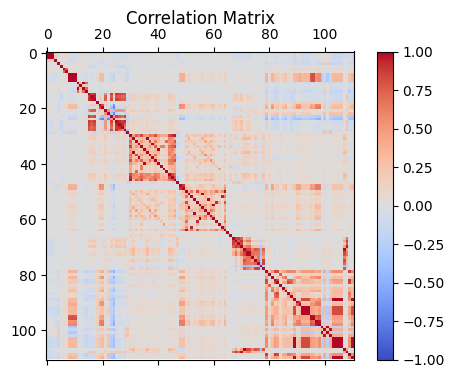

In [16]:
# make correlation and covariance matrix
corr_matrix = data.corr()
cov_matrix = data.cov()

fig, ax = plt.subplots(figsize=(6, 4))

# Display the correlation matrix as an image
corr_matrix_image = ax.matshow(corr_matrix, cmap="coolwarm", vmin=-1, vmax=1)

# Add color bar
fig.colorbar(corr_matrix_image)

# Show the plot
plt.title("Correlation Matrix", pad=20)
plt.show()

Everything really red or really blue is highly correlated and should be reviewed to be removed after PCA, if PCA doesn't cover it. It is really cool how the highly correlated fields seem to form squares. This shows that the correlated columns are next to each other, which makes sense when looking at the column names.

From here, we still have a lot of data cleaning to complete before the dataset is ready to analyze. Mainly we need to reduce the dimensionality, which will likely be fixed with PCA analysis, but may require some manual effort after. We also need to set up the dataset to randomly subset the dataset down to, say, 1000 rows at a time. We can set a seed to start, but we may want this to be randomly generated each time.

I deleted the 2 categorical datasets because separating these out to 1s and 0s would cause the dimensionality to increase even more. And I don't want to list them 1 to however-many-values because I don't want this to be thought of as a weighted score when it is just the locations of the points.

I think simply deleting these 2 columns warrants further discussion, but my thought is that our analysis should be based on the walkability of the area without knowing the location so that we can create a map to show the walkability scores in each location without having that location impact our model's accuracy.

Whenever deleting columns, be sure to include why you are deleting the columns in the notes so we can discuss further on Thursday. For example, if the columns have duplicate data, or are too highly correlated. We can use the PCA analysis as our main explanation for reducing the dimensionality too.

# Preprocessing


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
# Splitting df before any transformations to avoid leakage

X = data
y = walkability_given

np.random.seed(1)
X = X.sample(n=1000, axis=0, random_state=1)
y = y.loc[X.index]
print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

(1000, 111)
(1000,)


In [70]:
# Scaling data using standard scaler to 1. maintain shape of original distributions and 2. ensure all features contribute equally to PCA

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)


In [71]:
# Observe scaling effects
print("Original first 2 rows:")
print(X_train.iloc[:2])
print("Scaled first 2 rows:")
print(X_train_scaled_df.iloc[:2])

Original first 2 rows:
             GEOID10       GEOID20  STATEFP  COUNTYFP  TRACTCE  BLKGRPCE  \
93739   1.803500e+11  1.803500e+11       18        35     2301         1   
209839  5.300500e+11  5.300500e+11       53         5    11200         4   

          CSA     CBSA  CBSA_POP  CBSA_EMP  ...      D5CE     D5CEI  \
93739   294.0  34620.0    115616     46751  ...  0.008497  0.613883   
209839  313.0  28420.0    284828    120348  ...  0.007818  0.886315   

                D5DR         D5DRI          D5DE         D5DEI  D2A_Ranked  \
93739  -99999.000000 -99999.000000 -99999.000000 -99999.000000           8   
209839      0.010237      0.664367      0.010435      0.672282           8   

        D2B_Ranked  D3B_Ranked  D4A_Ranked  
93739           13           4           1  
209839          20          10          16  

[2 rows x 111 columns]
Scaled first 2 rows:
         GEOID10   GEOID20   STATEFP  COUNTYFP   TRACTCE  BLKGRPCE       CSA  \
93739  -0.629790 -0.629790 -0.627533 -0

In [72]:
# Verify mean ≈ 0 and std ≈ 1
print("Means:", X_train_scaled_df.mean())
print("Standard deviations:", X_train_scaled_df.std())

Means: GEOID10      -1.820766e-16
GEOID20      -1.820766e-16
STATEFP       8.881784e-17
COUNTYFP      8.881784e-18
TRACTCE       3.996803e-17
                  ...     
D5DEI        -1.332268e-17
D2A_Ranked    2.220446e-18
D2B_Ranked   -3.330669e-17
D3B_Ranked   -8.992806e-17
D4A_Ranked   -1.776357e-17
Length: 111, dtype: float64
Standard deviations: GEOID10       1.000626
GEOID20       1.000626
STATEFP       1.000626
COUNTYFP      1.000626
TRACTCE       1.000626
                ...   
D5DEI         1.000626
D2A_Ranked    1.000626
D2B_Ranked    1.000626
D3B_Ranked    1.000626
D4A_Ranked    1.000626
Length: 111, dtype: float64


In [73]:
#PCA

pca = PCA(n_components=0.95)  # n = 95% variance

X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [74]:
# Check dimensions
print("Training set shape:", X_train_pca.shape)
print("Test set shape:", X_test_pca.shape)

Training set shape: (800, 40)
Test set shape: (200, 40)


In [84]:
# Visualize with screeplot

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

40
[0.15278407 0.26158194 0.33817123 0.39956092 0.45134307 0.49429471
 0.53125126 0.5620416  0.59133356 0.61913022 0.64616092 0.67049753
 0.69192355 0.7097779  0.7263196  0.74229924 0.75807595 0.77330283
 0.78766251 0.80089581 0.81304855 0.82416588 0.83472982 0.84424304
 0.85322835 0.86195627 0.87030364 0.87837965 0.88623267 0.89345784
 0.90055528 0.90722864 0.91370354 0.91979332 0.92549794 0.93103359
 0.93645437 0.94156769 0.94632112 0.95088136]


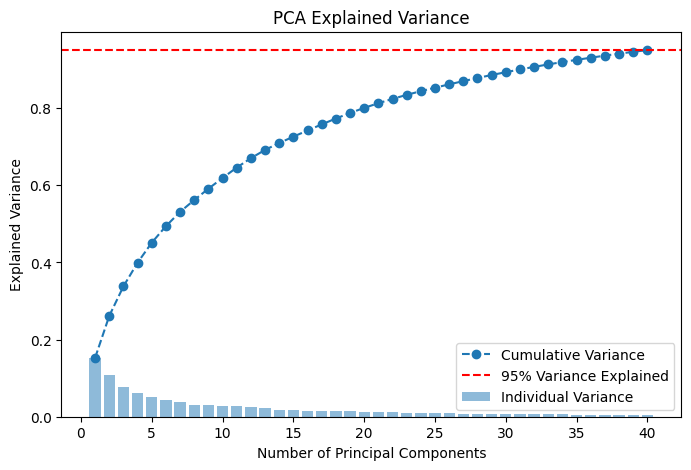

In [76]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance, marker='o', linestyle='--', label="Cumulative Variance")
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, label="Individual Variance")

plt.axhline(y=0.95, color='r', linestyle='--', label="95% Variance Explained")
plt.xlabel("Number of Principal Components")
plt.ylabel("Explained Variance")
plt.title("PCA Explained Variance")
plt.legend()
plt.show()

Conducting PCA while retaining 95% of variance gives 46 components. There is a significant drop in individual variance after ~20 components, and while the "elbow method" would suggest removing most components after this mark- my priority right now is to retain variance so I will use all 46 for now.

If processing time presents issues later I am comfortable exploring the effects of using 35-40 components.

# Additional Exploration

In [86]:
# Map PCA loadings to original features
pca_loadings = pd.DataFrame(
    pca.components_[:len(explained_variance_ratio)].T,
    index=X_train.columns,
    columns=[f'PC{i+1}' for i in range(len(explained_variance_ratio))]
)

print(pca_loadings.head())

               PC1       PC2       PC3       PC4       PC5       PC6  \
GEOID10  -0.018636 -0.016579 -0.071495 -0.006572 -0.076135 -0.010137   
GEOID20  -0.018636 -0.016579 -0.071495 -0.006572 -0.076135 -0.010137   
STATEFP  -0.018528 -0.016662 -0.071444 -0.006541 -0.076162 -0.010428   
COUNTYFP -0.020432  0.009937 -0.021785 -0.006018 -0.010387  0.043865   
TRACTCE  -0.037401 -0.007324 -0.026238 -0.026740 -0.056281 -0.016237   

               PC7       PC8       PC9      PC10  ...      PC31      PC32  \
GEOID10   0.030388 -0.187890  0.157767  0.354793  ...  0.037499  0.003303   
GEOID20   0.030388 -0.187890  0.157767  0.354793  ...  0.037499  0.003303   
STATEFP   0.030431 -0.187807  0.157219  0.354775  ...  0.039556  0.002783   
COUNTYFP -0.000932 -0.049277  0.116776  0.071495  ... -0.315657  0.083078   
TRACTCE  -0.010809 -0.027909 -0.036784 -0.009836  ... -0.087686 -0.274130   

              PC33      PC34      PC35      PC36      PC37      PC38  \
GEOID10  -0.003606 -0.030013  0.

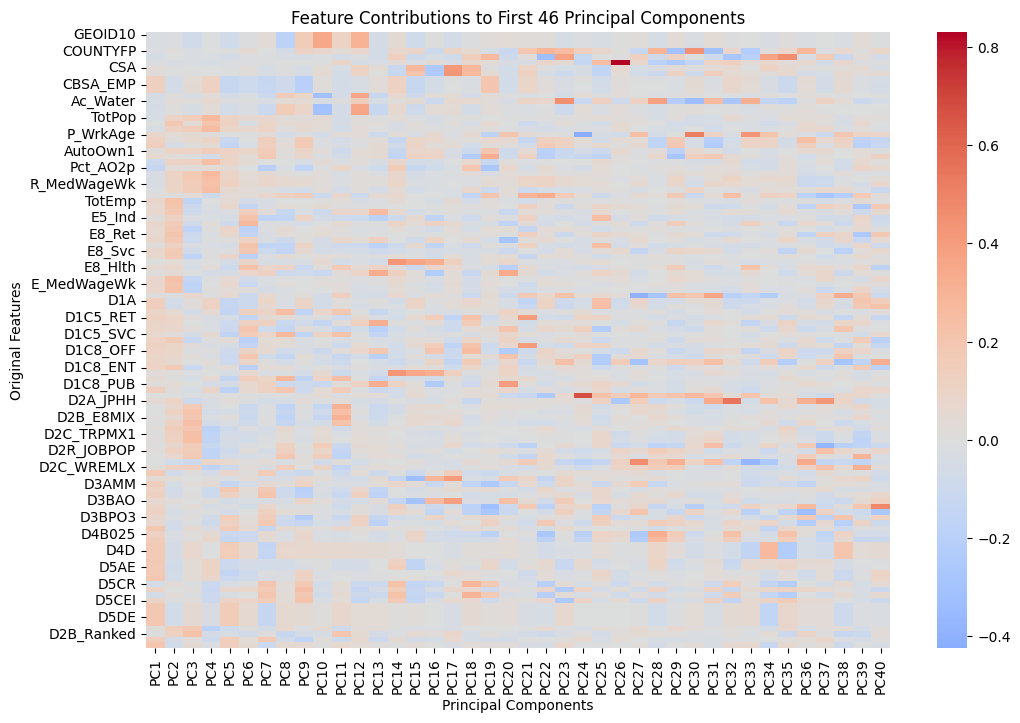

In [87]:
# Visualize loadings

plt.figure(figsize=(12, 8))
sns.heatmap(pca_loadings, cmap="coolwarm", center=0, annot=False)
plt.title("Feature Contributions to First 46 Principal Components")
plt.xlabel("Principal Components")
plt.ylabel("Original Features")
plt.show()

In [88]:
# Create df from scaled pca data and add back target variable. Also, index the dataframe with X_train
X_train_index = X_train.index
X_train_pca_df = pd.DataFrame(X_train_pca, index= X_train_index, columns=[f'PC{i+1}' for i in range(X_train_pca.shape[1])])

X_train_pca_df['NatWalkInd'] = y_train

# Correlation
pca_target_correlation = X_train_pca_df.corr()['NatWalkInd'].drop('NatWalkInd').sort_values(ascending=False)

# Display top 10 PCs most correlated with the target
print("Correlation between PCA components and target variable:")
print(pca_target_correlation.head(10))


Correlation between PCA components and target variable:
PC1     0.773154
PC3     0.380001
PC5     0.290039
PC12    0.107777
PC6     0.064485
PC37    0.051630
PC11    0.038688
PC23    0.036771
PC27    0.035543
PC32    0.033691
Name: NatWalkInd, dtype: float64


In [89]:
X_test_index = X_test.index
X_test_pca_df = pd.DataFrame(X_test_pca, index= X_test_index, columns=[f'PC{i+1}' for i in range(X_test_pca.shape[1])])
print(X_test_pca_df.shape)

(200, 40)


In [90]:
# Find PC most positively correlated with targer
most_correlated_pc = pca_target_correlation.idxmax()

# Contributing features to top PC
top_features = pca_loadings[[most_correlated_pc]].abs().sort_values(by=most_correlated_pc, ascending=False).head(10)

print("Top features contributing to {most_correlated_pc}:")
print(top_features)


Top features contributing to {most_correlated_pc}:
                 PC1
D4A_Ranked  0.196971
D5BE        0.191685
D5DEI       0.185641
D5DRI       0.185641
D5DR        0.185641
D5DE        0.185641
D4A         0.185358
D5AR        0.177570
D3A         0.173453
D5AE        0.171911


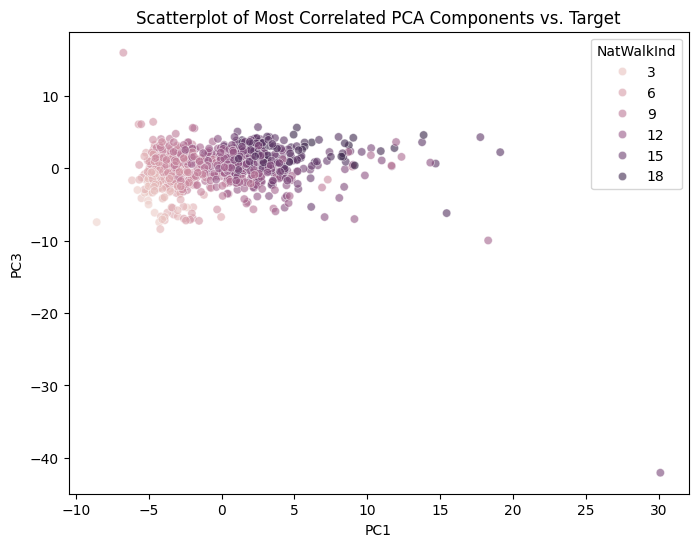

In [91]:
# Find and plot two most correlated PCs against each other, colored by index value
top_2_pcs = pca_target_correlation.index[:2]


plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_train_pca_df[top_2_pcs[0]], y=X_train_pca_df[top_2_pcs[1]], hue=y_train, alpha=0.6)
plt.xlabel(top_2_pcs[0])
plt.ylabel(top_2_pcs[1])
plt.title("Scatterplot of Most Correlated PCA Components vs. Target")
plt.legend(title="NatWalkInd")
plt.show()

** *The following explores correlation using original features, not principal commponents* **



In [92]:
# Features most correlated with walkindex
feature_target_correlation = X_train.corrwith(y_train).sort_values(ascending=False)

print("Top 10 original features correlated with the target:")
print(feature_target_correlation.head(10))


Top 10 original features correlated with the target:
D4A_Ranked    0.832406
D5DRI         0.814231
D5DEI         0.814231
D5DR          0.814231
D5DE          0.814231
D4A           0.813534
D3B_Ranked    0.745413
D3A           0.719485
D4D           0.685537
D4C           0.685236
dtype: float64


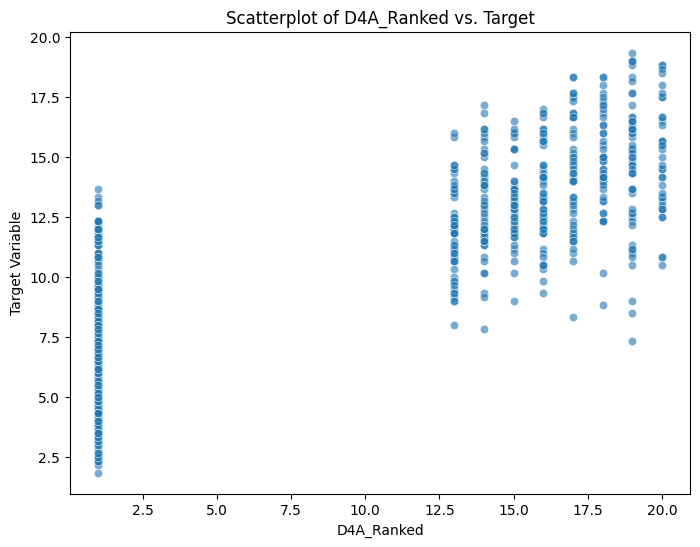

In [93]:
# Plot most positively correlated feature against target
top_feature = feature_target_correlation.idxmax()

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_train[top_feature], y=y_train, alpha=0.6)
plt.xlabel(top_feature)
plt.ylabel("Target Variable")
plt.title(f"Scatterplot of {top_feature} vs. Target")
plt.show()

D4A_Ranked ( type: esriFieldTypeDouble, alias: Quantile ranked order (1,13-20) of [D4a] from lowest to highest )

D4A (Distance from the population-weighted centroid to nearest transit stop (meters) )

KeyError: 'PC1'

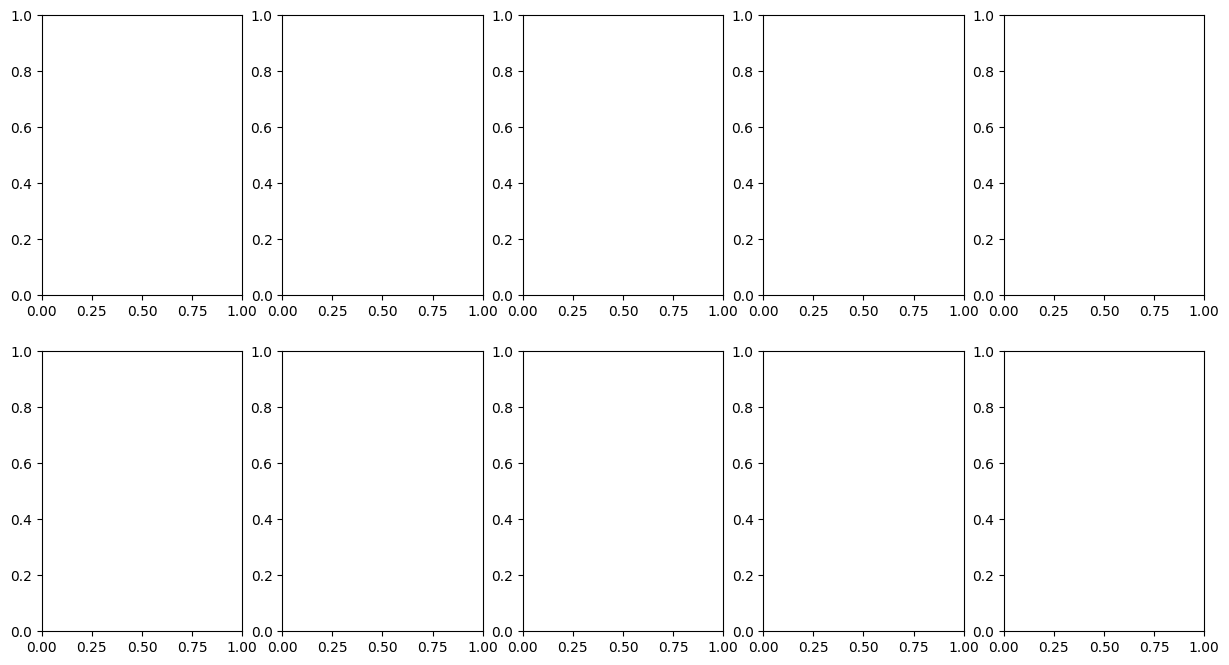

In [94]:
# Scatterplots of target vs. top features (picked based on earlier pc32 results)
fig, axes = plt.subplots(2, 5, figsize=(15, 8))
axes = axes.flatten()

for i, feature in enumerate(top_features):
    sns.scatterplot(x=X_train[feature], y=y_train, alpha=0.6, ax=axes[i])
    axes[i].set_title(f"{feature} vs. Target")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Target")

plt.tight_layout()
plt.show()


# Random Forest Model

In [95]:
from sklearn.ensemble import RandomForestRegressor

In [96]:
# find the tuning parameters of the random forest model and the default values.
def find_parameter(model):
  model1= model()
  print("Default Parameters:")
  for param, value in model1.get_params().items():
    print(f"{param}: {value}")
find_parameter(RandomForestRegressor)

Default Parameters:
bootstrap: True
ccp_alpha: 0.0
criterion: squared_error
max_depth: None
max_features: 1.0
max_leaf_nodes: None
max_samples: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.0
monotonic_cst: None
n_estimators: 100
n_jobs: None
oob_score: False
random_state: None
verbose: 0
warm_start: False


In [97]:
X_train_preprocessed = X_train_pca_df.drop('NatWalkInd', axis=1)
X_test_preprocessed = X_test_pca_df

In [98]:
# find the default model scores before tuning
def default_scores(model):
  model1 = model()
  model1.fit(X_train_preprocessed, y_train)
  print("Training score:", model1.score(X_train_preprocessed, y_train))
  print("Test score:", model1.score(X_test_preprocessed, y_test))
default_scores(RandomForestRegressor)

Training score: 0.9883762763690693
Test score: 0.9303584332628488


# Decision Tree